# Digital Assignment 2 - Image Processing
---------------------

## 2D Gaussian blur filter to Images
----------------------

### Name: Abhishek Singh
### Reg No: 15BCE1009
-------------------------------------

In [9]:
'''Applies 2D gaussian blur to images'''

from PIL import Image
import numpy as np
import math
from scipy import signal
import cv2
import matplotlib.pyplot as plt


def boxfilter(n):
    assert n % 2 == 1, "Dimension must be odd"

    weight = 1.0 / n / n

    return np.ones((n,n)) * weight

def gauss1d(sigma):
    len = round(sigma * 6)
    #If it's even, round it to the next odd by adding one
    if len % 2 == 0:
        len  += 1

    #Set up the array with incrementing by one e.g. [-2, -1, 0, 1, 2]
    arr = np.arange(round(-len/2+1), len/2, 1)
    #Apply the Gaussian function
    arr = np.exp( -1 * np.power(arr, 2) / (2 * np.power(sigma, 2)) )
    #Normalize by dividing by the sum
    return arr/sum(arr)

def gauss2d(sigma):
    #Get one axis of the 2D Gaussian filter by using the gauss1d 
    a = gauss1d(sigma)
    a = a[np.newaxis]

    #Do the same for the other axis, but make sure to transpose it
    b = gauss1d(sigma)
    b = np.transpose(b[np.newaxis])

    #Convolve the two matrices to create 2D Gaussian filter
    return signal.convolve2d(a, b)

def gaussconvolve2d(image,sigma):
    #Load up the Gaussian filter in a variable named filter
    filter = gauss2d(sigma)
    #Take the dir from input, open the image and convert to greyscale
    im = Image.open(image).convert('L')
    
    #Convert it to a numpy array and apply the Gaussian filter
    im = signal.convolve2d(np.asarray(im),filter,'same')

    #Transform the array back to an image, remember to output as a greyscale as well
    out = Image.fromarray(im).convert('L')

    #Save the image as a .jpd
    out.save('output.jpg', 'JPEG')
    
    
############CALLING THE FUNCTION TO GENERATE THE OUTPUT########################    
gaussconvolve2d('pic02.png', 2)

### Showing Original Image

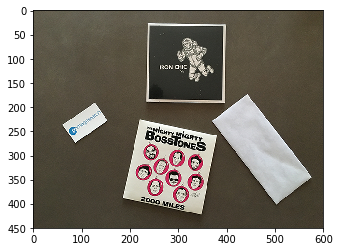

In [7]:
PATH = "pic02.png"
image = cv2.imread(PATH)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.show()

### Showing Image after applying filter

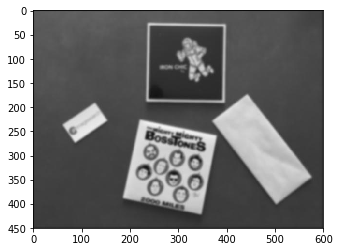

In [10]:
PATH = "output.jpg"
image = cv2.imread(PATH)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.show()